In [12]:
import tweepy
import re
from tweepy import OAuthHandler
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt


In [15]:
#Initializing the generic class for Sentiment Analysis
class TwitterClient(object):
    def __init__(self):
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'Enter Your Key'
        consumer_secret = 'Enter Your Key'
        access_token = 'Enter Your Key'
        access_token_secret = 'Enter Your Key'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error 404 : " + str(e)) 
    def pie_chart(self, p,n,ne):
        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [p, n, ne]
        explode = (0.1, 0.1, 0.1)

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()

        

Name of the Tweet:aapl
number of tweets:20
50.0
Positive tweets percentage: 50.0 %
Negative tweets percentage: 14.285714285714286 %
Neutral tweets percentage: 35.714285714285715 % 


Positive tweets:
Join @RobinhoodApp and we'll both get a stock like $AAPL, $F, or $S for free. Make sure to use my link. https://t.co/MsbNln6Wxs
AMD unveils new 7-nanometer next-generation Radeon VII GPU https://t.co/TwpjfbER2T $AAPL https://t.co/fmwyzPuTLX
.
https://t.co/JX4QNct8lt
94% Avg Gain
14 Years Online
#NYSE Trading &amp; Wall St Experienced
Family-Run!

$BTC $ETH… https://t.co/yFEvBvTdrd
Join @RobinhoodApp and we'll both get a stock like $AAPL, $F, or $S for free. Make sure to use my link. https://t.co/muqG6CR8IE
Feeling very bullish on $AAPL. I hope Apple has an Ace up there sleeve this upcoming earnings. https://t.co/6eYsypB94j
RT @Sandro_power: Live stream now  over at 10pm-10:15pm  eastern standard time $AAPL $BA $AMZN $MA $AMD  $STUDY      https://t.co/U9wfHSXorE
ACTIVE TRADERS Try one of th

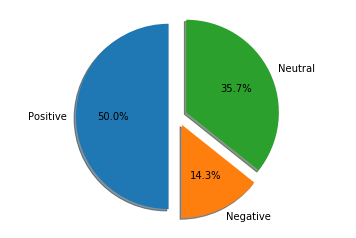

In [18]:
  
def main(): 
    # creating object of TwitterClient Class 
    query = input('Name of the Tweet:')
    count = input('number of tweets:')
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query, count) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    per_positive = 100*len(ptweets)/len(tweets)
    print(per_positive)
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets
    per_negative = 100*len(ntweets)/len(tweets)
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    per_neutral = 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)
    print("Neutral tweets percentage: {} % ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 
        
    
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [per_positive, per_negative, per_neutral]
    explode = (0.1, 0.1, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()    
#     per_positive = 100*len(ptweets)/len(tweets)
#     per_negative = 100*len(ntweets)/len(tweets)
#     per_neutral = 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)

    
if __name__ == "__main__": 
    # calling main function 
    main() 
    